# Introduction

Muhammad Ryo Tjokrosoedomo<br>
FTDS Batch 10

Informasi dataset

- AT: Ambient temperature (&deg;C)
- AP: Ambient pressure (mbar)
- AH: Ambient humidity (%)
- AFDP: Air filter difference pressure (mbar)
- GTEP: Gas turbine exhaust pressure (mbar)
- TIT: Turbine inlet temperature (&deg;C)
- TAT: Turbine after temperature (&deg;C)
- CDP: Compressor discharge pressure (mbar)
- TEY: Turbine energy yield (MWH)
- CO: Carbon monoxide (mg/m<sup>3</sup>)
- NOX: Nitrogen oxides (mg/m<sup>3</sup>)

Objective: membuat model regresi untuk menentukan emisi gas CO dan NOx dari sebuah turbin gas

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
import pickle

# Data Loading

In [2]:
df_2011 = pd.read_csv("gt_2011.csv")
df_2012 = pd.read_csv("gt_2012.csv")
df_2013 = pd.read_csv("gt_2013.csv")
df_2014 = pd.read_csv("gt_2014.csv")
df_2015 = pd.read_csv("gt_2015.csv")

In [3]:
df = pd.concat([df_2011, df_2012, df_2013, df_2014, df_2015])
df.reset_index(drop=True,inplace=True)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


Pengecekan tipe data dan missing value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


Semua data bertipe float dan tidak ada missing value

In [5]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


Hampir semua fitur berdistribusi normal dan memiliki range yang tidak terlalu besar

# Exploratory Data Analysis

/Users/tjokrosoedomo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tjokrosoedomo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tjokrosoedomo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

<AxesSubplot:xlabel='CDP', ylabel='Density'>

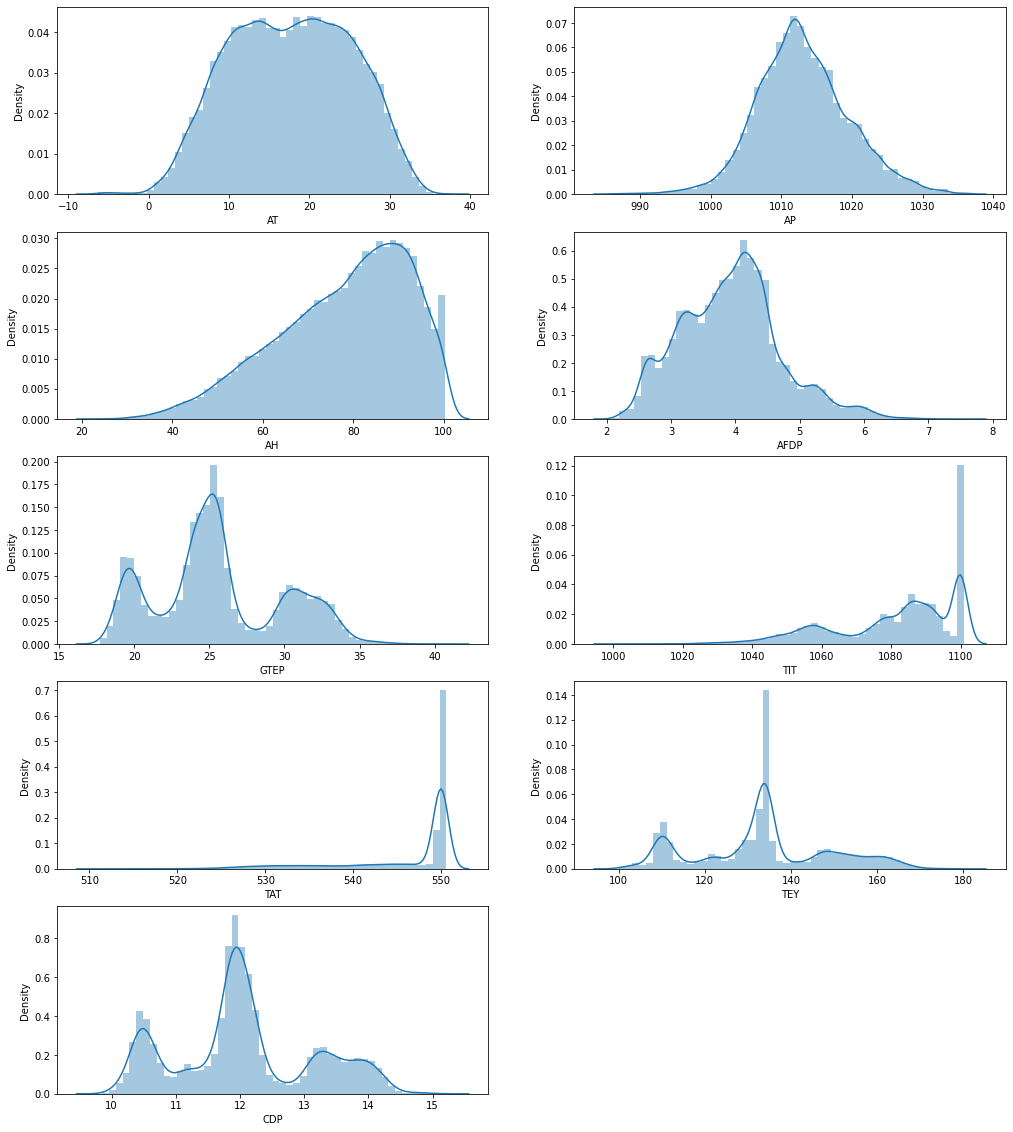

In [6]:
plt.subplots(figsize=(17,20))

plt.subplot(521)
sns.distplot(df["AT"])

plt.subplot(522)
sns.distplot(df["AP"])

plt.subplot(523)
sns.distplot(df["AH"])

plt.subplot(524)
sns.distplot(df["AFDP"])

plt.subplot(525)
sns.distplot(df["GTEP"])

plt.subplot(526)
sns.distplot(df["TIT"])

plt.subplot(527)
sns.distplot(df["TAT"])

plt.subplot(528)
sns.distplot(df["TEY"])

plt.subplot(529)
sns.distplot(df["CDP"])

- AT, AP, AFDP memiliki distribusi normal
- GTEP, TEY, dan CDP memiliki lebih dair satu puncak
- AH, TIT, dan TAT cenderung skewed
- TIT dan TAT memiliki satu titik yang sangat tinggi dibanding titik data lainnya
- Diasumsikan fitur kondisi operasi (AFDP, GTEP, TIT, TAT, TEY, dan CDP) keseluruhan datanya valid dan berhubungan dengan efisiensi kerja turbin

/Users/tjokrosoedomo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tjokrosoedomo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NOX', ylabel='Density'>

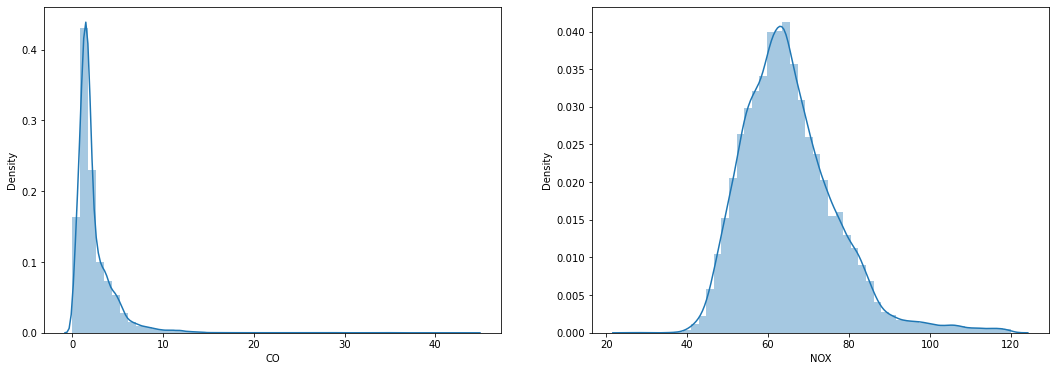

In [7]:
plt.subplots(figsize=(18,6))

plt.subplot(121)
sns.distplot(df["CO"])

plt.subplot(122)
sns.distplot(df["NOX"])

- Target CO terlihat skewed left
- Target NOX terlihat memiliki distribusi normal

<AxesSubplot:xlabel='TIT', ylabel='TAT'>

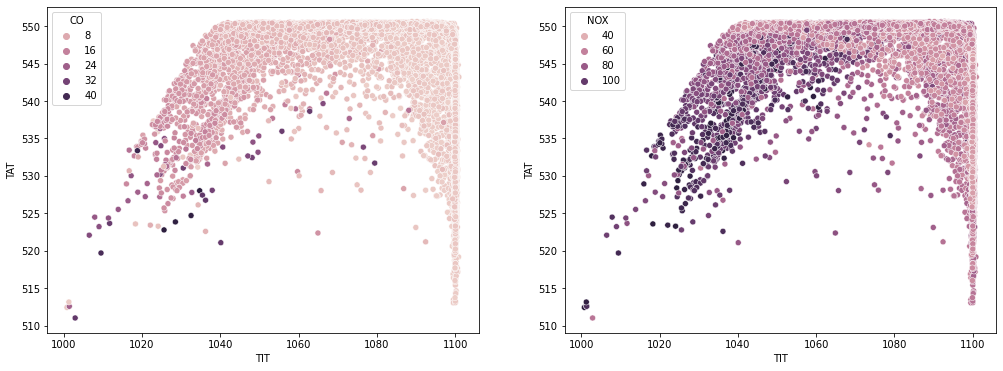

In [8]:
plt.subplots(figsize=(17,6))

plt.subplot(121)
sns.scatterplot(x=df["TIT"], y=df["TAT"], hue=df["CO"])

plt.subplot(122)
sns.scatterplot(x=df["TIT"], y=df["TAT"], hue=df["NOX"])

CO dan NOX cenderung lebih tinggi pada keadaan TIT dan TAT yang rendah

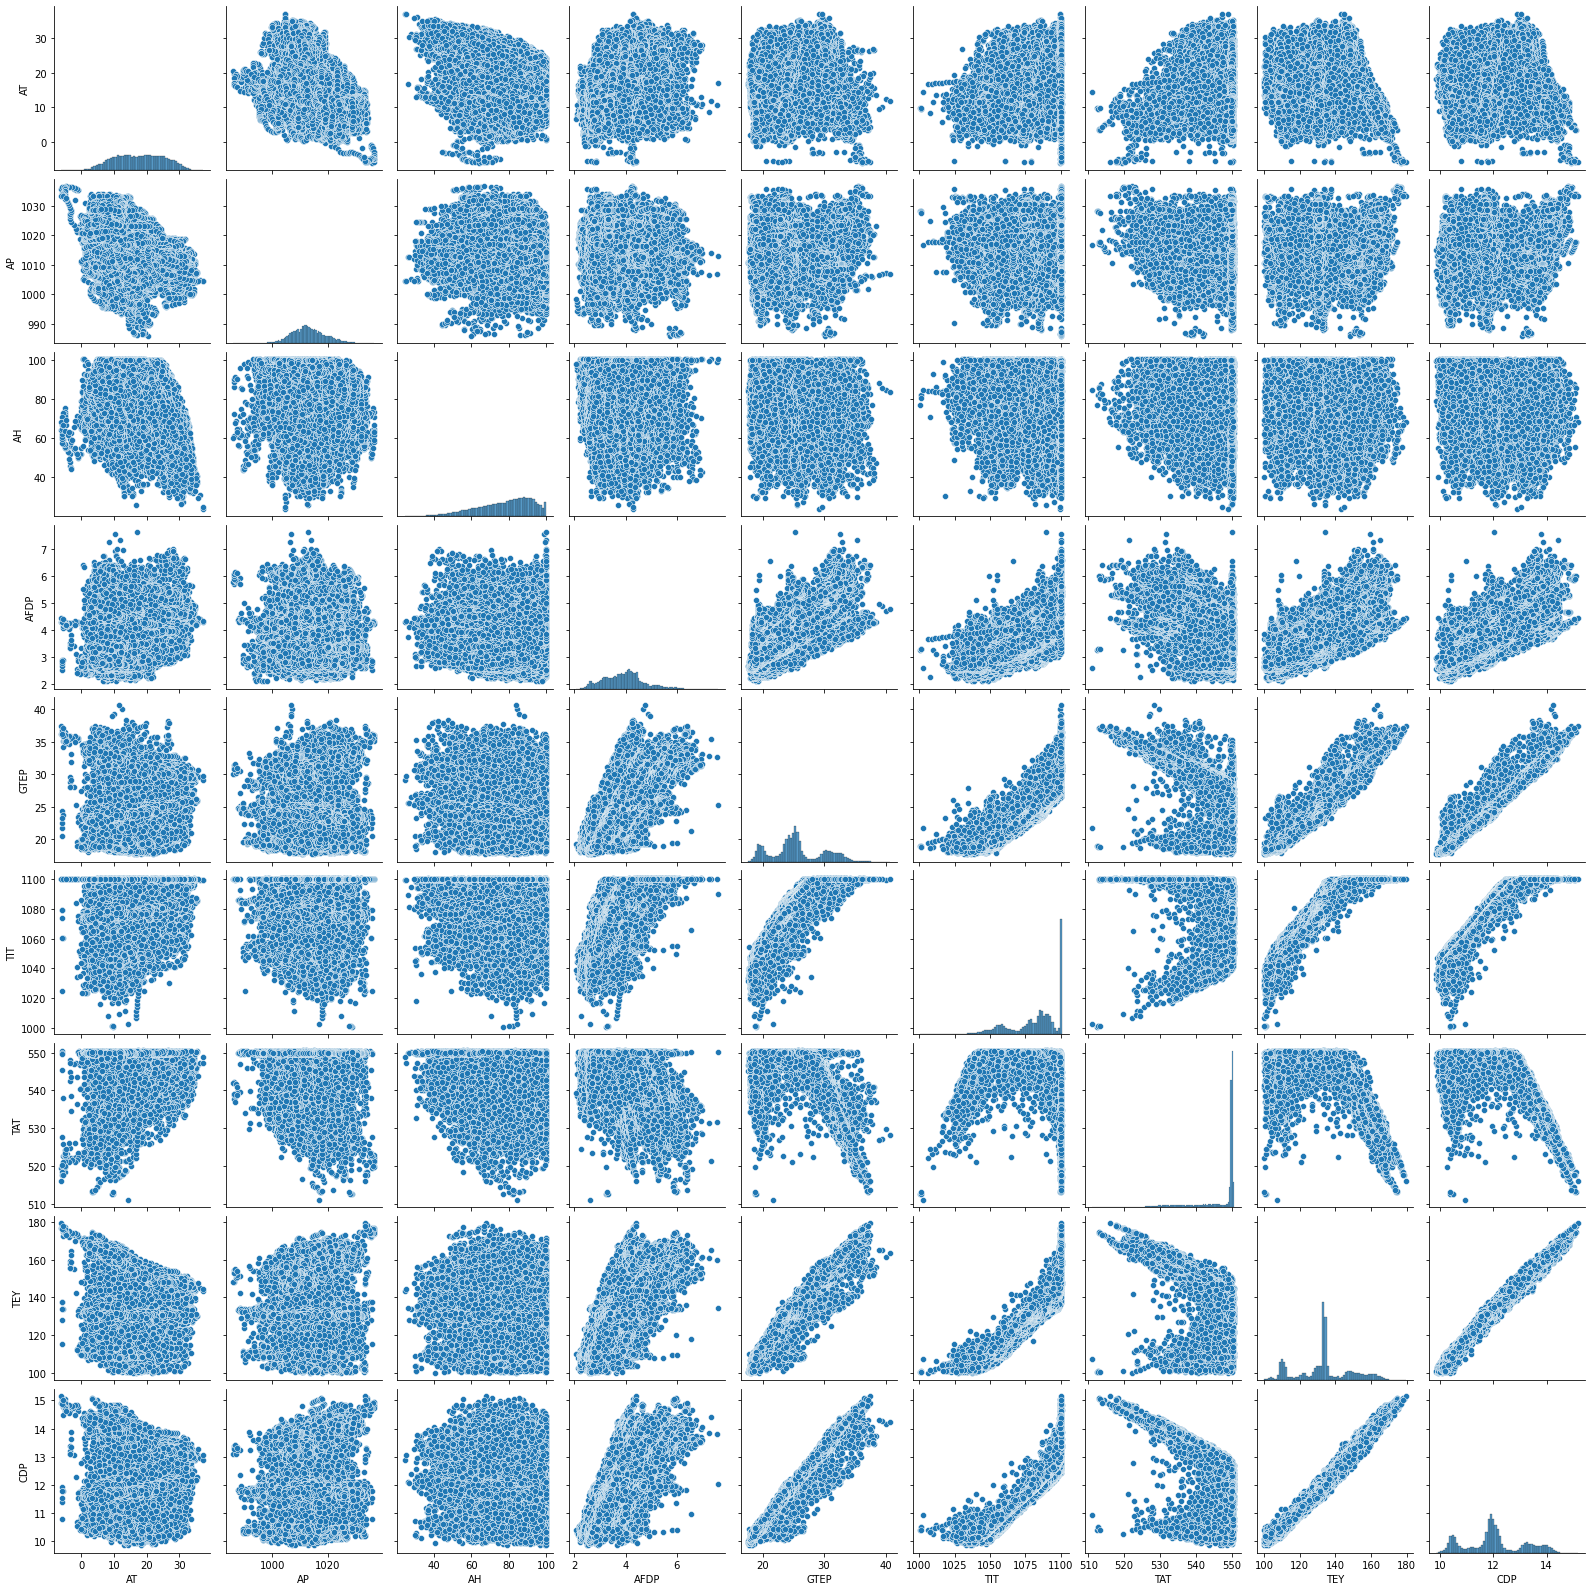

In [9]:
sns.pairplot(df.drop(["CO","NOX"], axis=1))

Dari pairplot tersebut dapat terlihat beberapa hal:
- AFDP dengan GTEP, TIT, TEY dan CDP terlihat sedikit memiliki korelasi
- GTEP dengan AFDP, TIT, TEY dan CDP terlihat memiliki korelasi sedang
- TIT dengan AFDP, GTEP, TEY dan CDP terlihat memiliki korelasi sedang
- TEY dan CDP memiliki korelasi yang sangat tinggi
- TEY dengan AFDP, GTEP, dan TIT memiliki korelasi positif yang cukup tinggi
- CDP dengan AFDP, GTEP, dan TIT memiliki korelasi positif yang cukup tinggi
- CDP dan TEY perlu diperhatikan lebih lanjut, juga AFDP, GTEP, dan TIT

<AxesSubplot:xlabel='CDP', ylabel='TEY'>

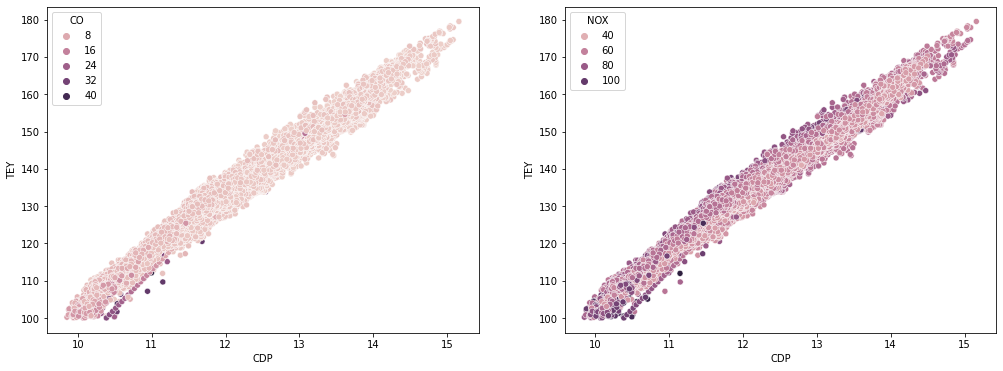

In [10]:
plt.subplots(figsize=(17,6))

plt.subplot(121)
sns.scatterplot(x=df["CDP"], y=df["TEY"], hue=df["CO"])

plt.subplot(122)
sns.scatterplot(x=df["CDP"], y=df["TEY"], hue=df["NOX"])

- CDP maupun TEY tidak terlihat memiliki korelasi terhadap CO
- Nilai NOX yang lebih tinggi terlihat lebih cenderung berada pada CDP dan TEY yang lebih tinggi

# Data Preprocessing

Splitting data train-test-inference

In [11]:
df_inf = df.sample(20, random_state=9)

In [12]:
X = df.drop(["CO", "NOX"], axis=1)
y = df[["CO", "NOX"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

## Pengecekan Outlier

/Users/tjokrosoedomo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tjokrosoedomo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tjokrosoedomo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

<AxesSubplot:xlabel='CDP'>

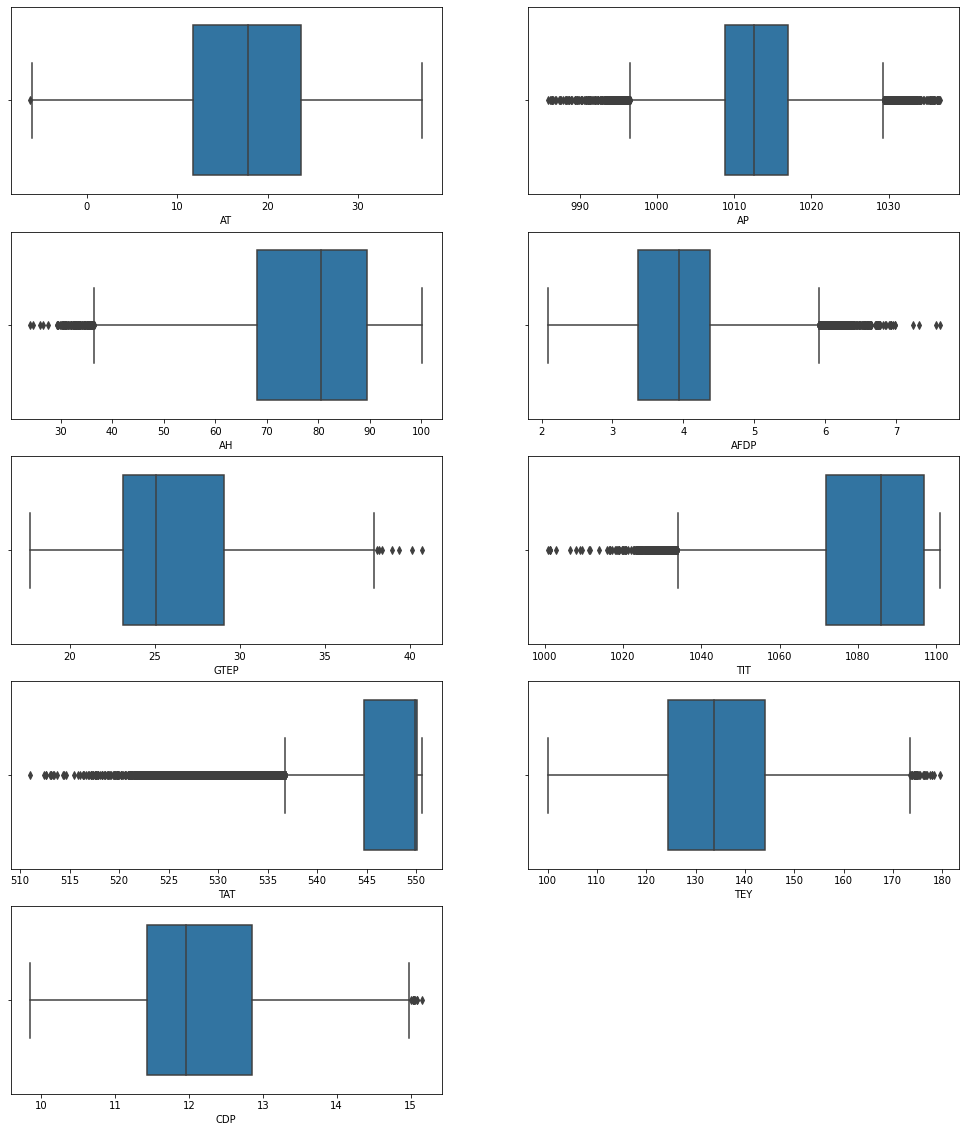

In [13]:
plt.subplots(figsize=(17,20))

plt.subplot(521)
sns.boxplot(df["AT"])

plt.subplot(522)
sns.boxplot(df["AP"])

plt.subplot(523)
sns.boxplot(df["AH"])

plt.subplot(524)
sns.boxplot(df["AFDP"])

plt.subplot(525)
sns.boxplot(df["GTEP"])

plt.subplot(526)
sns.boxplot(df["TIT"])

plt.subplot(527)
sns.boxplot(df["TAT"])

plt.subplot(528)
sns.boxplot(df["TEY"])

plt.subplot(529)
sns.boxplot(df["CDP"])

In [14]:
X_train.skew()

AT     -0.046069
AP      0.185435
AH     -0.635175
AFDP    0.387746
GTEP    0.330034
TIT    -0.893882
TAT    -1.760616
TEY     0.116471
CDP     0.237543
dtype: float64

AH, TIT, dan TAT bersifat skewed, dan sisanya berdistribusi normal

In [15]:
def outlier_iqr(df, feature, distance):
    Q1 = np.quantile(df[feature], 0.25)
    Q3 = np.quantile(df[feature], 0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + distance*IQR
    lower_limit = Q1 - distance*IQR
    
    outlier = ((df[feature] < lower_limit) | (df[feature] > upper_limit))
    
    return outlier, upper_limit, lower_limit

In [16]:
def outlier_z(df, feature):
    upper_limit = df[feature].mean() + 3*df[feature].std()
    lower_limit = df[feature].mean() - 3*df[feature].std()
    
    outlier = ((df[feature] < lower_limit) | (df[feature] > upper_limit))
    
    return outlier, upper_limit, lower_limit

In [17]:
def outlier_percentage(outlier):
    true = outlier[outlier == True].count()
    total = outlier.count()
    
    percentage_true = (true/total)*100

    return percentage_true

In [18]:
outlier_AT, up_AT, low_AT = outlier_z(X_train, "AT")
outlier_AP, up_AP, low_AP = outlier_z(X_train, "AP")
outlier_AH, up_AH, low_AH = outlier_iqr(X_train, "AH", 1.5)
outlier_AFDP, up_AFDP, low_AFDP = outlier_z(X_train, "AFDP")
outlier_GTEP, up_GTEP, low_GTEP = outlier_z(X_train, "GTEP")
outlier_TIT, up_TIT, low_TIT = outlier_iqr(X_train, "TIT", 1.5)
outlier_TAT, up_TAT, low_TAT = outlier_iqr(X_train, "TAT", 1.5)
outlier_TEY, up_TEY, low_TEY = outlier_z(X_train, "TEY")
outlier_CDP, up_CDP, low_CDP = outlier_z(X_train, "CDP")

In [19]:
print("AT outlier percentage:",outlier_percentage(outlier_AT))
print("AP outlier percentage:",outlier_percentage(outlier_AP))
print("AH outlier percentage:",outlier_percentage(outlier_AH))
print("AFDP outlier percentage:",outlier_percentage(outlier_AFDP))
print("GTEP outlier percentage:",outlier_percentage(outlier_GTEP))
print("TIT outlier percentage:",outlier_percentage(outlier_TIT))
print("TAT outlier percentage:",outlier_percentage(outlier_TAT))
print("TEY outlier percentage:",outlier_percentage(outlier_TEY))
print("CDP outlier percentage:",outlier_percentage(outlier_CDP))

AT outlier percentage: 0.078268563261417
AP outlier percentage: 0.5785067719322126
AH outlier percentage: 0.35731300619342543
AFDP outlier percentage: 0.3675219492275233
GTEP outlier percentage: 0.020417886068195737
TIT outlier percentage: 0.8949840059892467
TAT outlier percentage: 13.765058190975294
TEY outlier percentage: 0.0
CDP outlier percentage: 0.0


Trimming outlier hanya dilakukan pada fitur yang berhubungan dengan kondisi lingkungan, namun fitur yang berhubungan dengan kondisi operasi tidak ditrim karena seluruh titik data berkaitan dengan keadaan efisiensi turbin yang sedang bekerja

In [20]:
X_train_trim = X_train[(X_train["AT"] > low_AT) & (X_train["AT"] < up_AT) & (X_train["AP"] > low_AP) & 
        (X_train["AP"] < up_AP) & (X_train["AH"] > low_AH) & (X_train["AH"] < up_AH)]

In [21]:
X_test_trim = X_test[(X_test["AT"] > low_AT) & (X_test["AT"] < up_AT) & (X_test["AP"] > low_AP) & 
        (X_test["AP"] < up_AP) & (X_test["AH"] > low_AH) & (X_test["AH"] < up_AH)]

In [22]:
y_train = y_train.reindex(X_train_trim.index)
y_test = y_test.reindex(X_test_trim.index)

# Feature Scaling

In [23]:
scaler = StandardScaler()
scaler.fit(X_train_trim)

X_train_trim_scaled = scaler.transform(X_train_trim)
X_test_trim_scaled = scaler.transform(X_test_trim)

In [24]:
X_train_trim_scaled = pd.DataFrame(X_train_trim_scaled)
X_test_trim_scaled = pd.DataFrame(X_test_trim_scaled)

# Model Definition

In [25]:
linreg = LinearRegression()
rf = RandomForestRegressor(random_state=9)
knn = KNeighborsRegressor()
ridge = Ridge()
dt = DecisionTreeRegressor(random_state=9)

# Model Training

In [26]:
linreg.fit(X_train_trim_scaled, y_train)
lin_pred = linreg.predict(X_test_trim_scaled)

In [27]:
knn.fit(X_train_trim_scaled, y_train)
knn_pred = knn.predict(X_test_trim_scaled)

In [28]:
rf.fit(X_train_trim_scaled, y_train)
rf_pred = rf.predict(X_test_trim_scaled)

In [29]:
ridge.fit(X_train_trim_scaled, y_train)
ridge_pred = ridge.predict(X_test_trim_scaled)

In [30]:
dt.fit(X_train_trim_scaled, y_train)
dt_pred = dt.predict(X_test_trim_scaled)

# Model Evaluation

Cross validation

In [31]:
for model in [linreg, knn, rf, ridge, dt]:
    acc_train_cross_val = cross_val_score(model, 
                    X_train_trim_scaled, 
                    y_train, 
                    cv=5, scoring="r2")
    print(model, 'Mean r2 Score : ', acc_train_cross_val.mean())
    print(model, 'Std r2 Score : ', acc_train_cross_val.std(), "\n")   

LinearRegression() Mean r2 Score :  0.5385058805855625
LinearRegression() Std r2 Score :  0.00630096354920474 

KNeighborsRegressor() Mean r2 Score :  0.7914605384109409
KNeighborsRegressor() Std r2 Score :  0.011596355461078489 

RandomForestRegressor(random_state=9) Mean r2 Score :  0.8069058723361788
RandomForestRegressor(random_state=9) Std r2 Score :  0.0138017520578997 

Ridge() Mean r2 Score :  0.5385036074800407
Ridge() Std r2 Score :  0.006297254743204957 

DecisionTreeRegressor(random_state=9) Mean r2 Score :  0.6044638936318677
DecisionTreeRegressor(random_state=9) Std r2 Score :  0.03420106886132548 



## Hyperparameter Tuning

Randomized Search CV

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 1000, num = 10)]
min_samples_split = [2,5,8,11]
min_samples_leaf = [1,3,5,7,9]
random_grid = {"n_estimators": n_estimators,
               "max_depth": max_depth,
               "min_samples_split":min_samples_split,
               "min_samples_leaf":min_samples_leaf,
               "max_features":["auto", "sqrt", "log2"]}
random_grid

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 8, 11],
 'min_samples_leaf': [1, 3, 5, 7, 9],
 'max_features': ['auto', 'sqrt', 'log2']}

In [33]:
rf_randomcv = RandomizedSearchCV(estimator=RandomForestRegressor(), 
                                 param_distributions=random_grid,
                                 n_iter=10,
                                 cv=5, 
                                 random_state=7, 
                                 n_jobs=-1)
rf_randomcv.fit(X_train_trim_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 5, 8, 11],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=7)

In [34]:
rf_randomcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 230}

In [35]:
rf_randomcv_best = rf_randomcv.best_estimator_

In [62]:
y_predict_rf_rcv = rf_randomcv_best.predict(X_test_trim_scaled)

print('r2 score (rcv): ', r2_score(y_test, y_predict_rf_rcv))
print('MAE (rcv):', mean_absolute_error(y_test, y_predict_rf_rcv))
print('RMSE (rcv):', mean_squared_error(y_test, y_predict_rf_rcv, squared=False))

r2 score (rcv):  0.834086823149756
MAE (rcv): 1.5834528819497398
RMSE (rcv): 2.5754633608714252


In [63]:
print("r2 score (default):", r2_score(y_test,rf_pred))
print("MAE (default):", mean_absolute_error(y_test,rf_pred))
print("RMSE (default):", mean_squared_error(y_test,rf_pred, squared=False))

r2 score (default): 0.8405202159838058
MAE (default): 1.5458661802386657
RMSE (default): 2.5327564848984534


Menggunakan model default yang memiliki performa lebih baik

In [64]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=9))
pipe.fit(X_train_trim_scaled, y_train)
y_pred_pipe = pipe.predict(X_test_trim_scaled)

Save model ke dalam file .pkl

In [66]:
with open("rf_pipe.pkl", "wb") as f:
  pickle.dump(pipe, f)

# Model Inference

In [67]:
df_inf.reset_index(drop=True,inplace=True)

In [68]:
df_inf_model = df_inf.drop(["CO", "NOX"], axis=1)

In [69]:
inf_pred = rf.predict(df_inf_model)
inf_pred = pd.DataFrame(inf_pred, columns=["Predicted CO", "Predicted NOx"])

In [70]:
df_inf.join(inf_pred)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Predicted CO,Predicted NOx
0,23.4530,1006.2,84.837,3.7535,25.364,1088.7,550.39,132.47,12.009,1.34970,58.948,1.365525,64.98682
1,28.7090,1011.2,59.574,6.0321,29.661,1100.0,542.01,145.91,13.102,1.63430,62.909,1.365525,64.98682
2,21.8330,1017.0,81.262,3.9663,27.020,1092.9,544.91,139.04,12.621,0.78632,61.083,1.365525,64.98682
3,7.8167,1022.2,88.135,4.6605,32.893,1100.0,526.21,164.73,14.177,0.72742,66.369,1.365525,64.98682
4,19.9120,1013.1,86.846,3.6710,23.405,1080.2,550.25,126.90,11.730,1.35980,56.675,1.365525,64.98682
5,7.0193,1019.9,89.311,5.7050,31.365,1100.0,533.91,159.52,13.644,0.42963,66.025,1.365525,64.98682
6,14.4420,1015.7,94.518,3.2216,25.220,1088.4,549.83,135.10,11.959,0.95308,62.746,1.365525,64.98682
7,12.5810,1013.3,75.284,4.4191,24.555,1087.1,549.81,134.73,11.939,1.60450,82.356,1.365525,64.98682
8,31.6260,1007.5,47.894,4.8447,29.960,1099.8,541.71,145.71,13.092,0.40252,58.630,1.365525,64.98682
9,30.0560,1009.3,69.604,4.3359,26.412,1094.5,550.12,133.84,12.270,1.76870,65.135,1.365525,64.98682


Terlihat perbedaan yang cukup besar pada nilai-nilai yang terletak cukup jauh dari mean/median CO dan NOx

# Conclusions

Karena terjadi overfitting pada model, maka performa model masih perlu ditingkatkan lagi